In [146]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# Regularization

#### 비용함수에 alpha값으로 페널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 것이 규제(Regularization)

1. L2규제 : alpha x W의 제곱 으로 페널티 부여
2. L1규제 : alpha x W의 절댓값 으로 페널티 부여


<br>
-> L2규제를 적용하면 페널티가 커서 비용 함수는 회귀 계수 W의 값을 작게 해 과적합을 개선한다.(피처의 영향력을 줄임)<br><br>
-> L1규제를 적용하면 페널티가 작아서 비용 함수는 회귀 계수 W의 값이 커져도 어느 정도 상쇄가 가능하므로 학습 데이터 적합을 더 개선할 수 있다.<br><br>
-> L2규제를 적용하는 것이 Ridge, L1규제를 적용하는 것은 Lasso가 있다. 

<br><br>

- 보스턴 주택 가격 데이터 세트 불러오기

In [7]:
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
#boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가
bostonDF['PRICE'] = boston.target #결과 컬럼 추가

In [9]:
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [10]:
bostonDF.shape

(506, 14)

In [13]:
X_data= bostonDF.drop('PRICE',axis=1)
y_target=  bostonDF['PRICE']
X_train, X_test,y_train, y_test = train_test_split(X_data, y_target,test_size=0.3, random_state = 123)

<br><br>
# Ridge

In [14]:
ridge =Ridge(alpha =10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error",cv= 5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [19]:
print('5 folds의 개별 Negative MSE scores ', np.round(neg_mse_scores,3))
print('5 folds의 개별 RMSE scores ', np.round(rmse_scores,3))
print('5 folds의 개별 RMSE ', np.round(avg_rmse,3))

5 folds의 개별 Negative MSE scores  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores  [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 개별 RMSE  5.518


- alpha값의 변화에 따른 5폴드의 RMSE평균값 알아보기

In [24]:
alphas = [0,0.1,1,10,50,100]

for alpha in alphas:
    ridge = Ridge(alpha= alpha)
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error",cv= 5)
    rmse_scores = np.mean(np.sqrt(-1*neg_mse_scores))
    print(f"alpha: {alpha}, 5 folds의 평균 RMSE: {np.round(rmse_scores,3)}\n")

alpha: 0, 5 folds의 평균 RMSE: 5.829

alpha: 0.1, 5 folds의 평균 RMSE: 5.788

alpha: 1, 5 folds의 평균 RMSE: 5.653

alpha: 10, 5 folds의 평균 RMSE: 5.518

alpha: 50, 5 folds의 평균 RMSE: 5.373

alpha: 100, 5 folds의 평균 RMSE: 5.33



---------
alpha값이 커질수록 모델의 성능이 높아지는 것을 확인

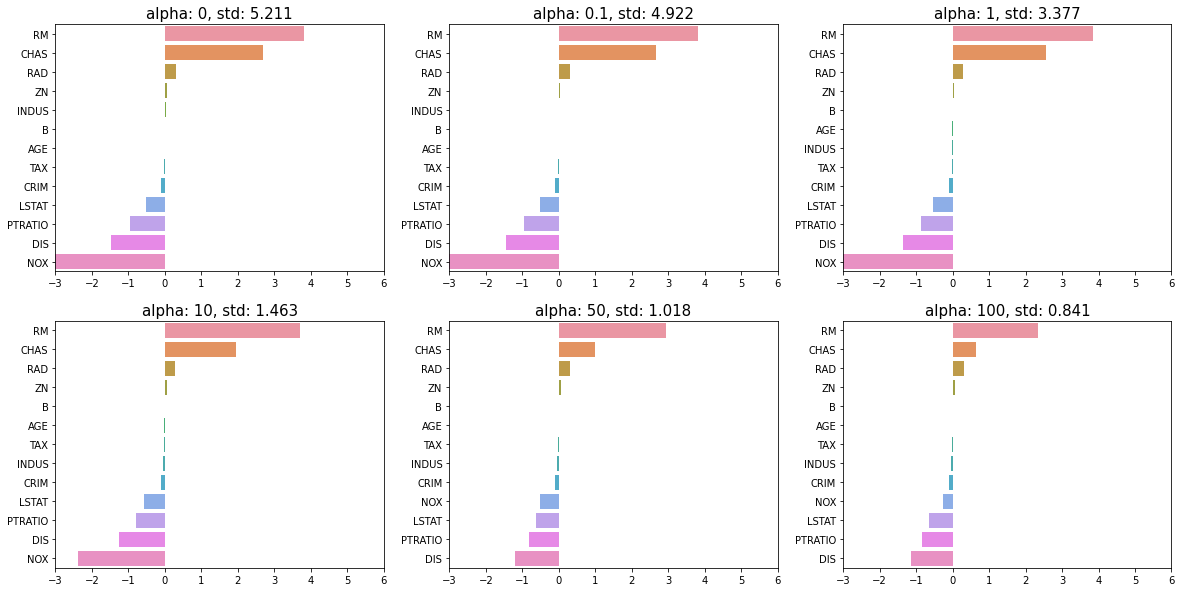

In [76]:
coeff_df = pd.DataFrame()
plt.figure(figsize=(20,10))
#각 alpha에 따른 회귀 계수 값을 시각화
for e, alpha in enumerate(alphas,1):
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_data,y_target)
    coeff = pd.Series(data=ridge.coef_,index=X_data.columns)
    colname = f"alpha: {str(alpha)}, std: {np.round(coeff.describe()[2],3)}"
    #막대 그래프로 각 alpha값에서의 회귀 계수 시각화. 회귀 계수 값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending = False)
    plt.subplot(2,3,e)
    plt.title(colname,size = 15)
    sns.barplot(x=coeff.values, y=coeff.index).set_xlim(-3,6)


--------------
alpha값이 커질수록 회귀계수가 작아지고 있고, 표준편차도 작아지고 있다.

<br><br>
# Lasso
- L1규제를 선형 회귀에 적용한 것
- L2규제가 회귀 계수의 크기를 감소시키는 데 반해, L1규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거한다.
- 따라서 L1규제는 적절한 피처만 회귀에 포함시키는 피처 선택의 특성을 갖고 있다.

# ElasticNet
- L1과 L2규제를 결합한 회귀 (a * L1 + b * L2)
- Lasso회귀가 서로 상관관계가 높은 피처 중 중요 피처만을 선택하고 다른 피처들은 모두 회귀 계수를 0으로 만드는데, <br>이를 완화하기 위해 L2규제를 Lasso회귀에 추가한 것
- 단점은 L1과 L2규제가 결합된 규제로 인해 수행시간이 상대적으로 오래 걸린다.
- 주요 파라미터: alpha, l1_ratio -> alpha는 a+b, l1_ratio = a/(a+b) 이다. <br>즉, l1_ratio는 L1의 비중을 나타낸다. -> 1이면 b=0(L1규제만), 0이면 b=1(L2규제만))


In [81]:
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n = None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose: print(f"-------{model_name}------")
    for param in params:
        if model_name == "Ridge": model = Ridge(alpha= param)
        elif model_name=="Lasso": model = Lasso(alpha=param)
        else: model = ElasticNet(alpha=param, l1_ratio=0.7) #alpha = a+b값, l1_ratio=a/(a+b)
            
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print(f'alpha: {param}, 5 folds 세트의 평균 RMSE: {np.round(avg_rmse,3)}')
        
        #cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data, y_target)
        
        #alpha에 다른 피처별 회귀 계수를 Series로 변환하고 이를 DF의 칼럼으로 추가
        coeff= pd.Series(data=model.coef_, index=X_data.columns)
        colname= f'alpha: {param}'
        coeff_df[colname]= coeff
        
    return coeff_df

In [86]:
get_linear_reg_eval("Lasso", [0.01,0.05,0.07,0.1,0.5,1,3], X_data, y_target)

-------Lasso------
alpha: 0.01, 5 folds 세트의 평균 RMSE: 5.74
alpha: 0.05, 5 folds 세트의 평균 RMSE: 5.628
alpha: 0.07, 5 folds 세트의 평균 RMSE: 5.612
alpha: 0.1, 5 folds 세트의 평균 RMSE: 5.615
alpha: 0.5, 5 folds 세트의 평균 RMSE: 5.669
alpha: 1, 5 folds 세트의 평균 RMSE: 5.776
alpha: 3, 5 folds 세트의 평균 RMSE: 6.189


,alpha: 0.01,alpha: 0.05,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
CRIM,-0.106228,-0.098935,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000
ZN,0.046860,0.048826,0.049059,0.049211,0.049544,0.049165,0.037231
INDUS,0.006474,-0.041355,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CHAS,2.504190,1.761631,1.434343,0.955190,0.000000,0.000000,0.000000
NOX,-14.394478,-1.044929,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
RM,3.814186,3.836618,3.789725,3.703202,2.498212,0.949811,0.000000
AGE,-0.001818,-0.011858,-0.011706,-0.010037,0.003604,0.020910,0.042495
DIS,-1.422155,-1.202690,-1.176583,-1.160538,-0.936605,-0.668790,-0.000000
RAD,0.298526,0.271034,0.270936,0.274707,0.277451,0.264206,0.061864
TAX,-0.012627,-0.014028,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602


----------
alpha값이 커짐에 따라 회귀 계수가 0인 피처들이 많아지고 있다.
<br><br>

In [87]:
get_linear_reg_eval("ElasticNet", [0.01,0.05,0.07,0.1,0.5,1,3], X_data, y_target)
    

-------ElasticNet------
alpha: 0.01, 5 folds 세트의 평균 RMSE: 5.627
alpha: 0.05, 5 folds 세트의 평균 RMSE: 5.555
alpha: 0.07, 5 folds 세트의 평균 RMSE: 5.542
alpha: 0.1, 5 folds 세트의 평균 RMSE: 5.526
alpha: 0.5, 5 folds 세트의 평균 RMSE: 5.467
alpha: 1, 5 folds 세트의 평균 RMSE: 5.597
alpha: 3, 5 folds 세트의 평균 RMSE: 6.068


,alpha: 0.01,alpha: 0.05,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
CRIM,-0.103056,-0.099912,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
ZN,0.047929,0.049631,0.050107,0.050617,0.052878,0.052136,0.038268
INDUS,-0.020189,-0.043435,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CHAS,2.384052,1.615711,1.330724,0.979706,0.000000,0.000000,0.000000
NOX,-7.772643,-1.023177,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000
RM,3.850281,3.679112,3.574162,3.414154,1.918419,0.938789,0.000000
AGE,-0.007635,-0.010750,-0.010116,-0.008276,0.007760,0.020348,0.043446
DIS,-1.324726,-1.210164,-1.189438,-1.173647,-0.975902,-0.725174,-0.031208
RAD,0.284221,0.277089,0.278880,0.283443,0.300761,0.289299,0.146846
TAX,-0.013226,-0.014245,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417


-----------
Lasso에 비해 회귀 계수가 0인 피처들이 적다.

<br><br><br>
# 선형 회귀 모델을 위한 데이터 변환
- 선형 회귀 모델과 같은 선형 모델은 일반적으로 피처와 타깃값 간에 선형 관계가 있다고 가정하고, 최적의 선형함수를 찾아 결과값을 예측한다.
<br>또한 선형 회귀 모델은 피처값과 타깃값의 분포가 정규분포의 형태를 매우 선호한다.
- 타깃값의 경우 정규 분포 형태가 아니라 특정값의 분포가 치우친 왜곡된 형태의 분포도일 경우 예측 성능에 부정적인 영향을 미칠 가능성이 높다.
- 피처값 또한 타깃값보다는 덜하지만 왜곡된 분포도로 인해 예측 성능에 부정적인 영향을 미칠 수 있다.
<br>-> 따라서 선형 회귀 모델을 적용하기 전에 먼저 데이터에 대한 스케일링/정규화 작업을 수행하는 것이 일반적

### 데이터 세트에 적용하는 변환 작업
- 스케일링/정규화 -> 간단 but 예측 성능 향상을 크게 기대하기 어려움
- 스케일링/정규화 + 다항식 -> 피처 개수가 많은 경우 예측 성능 향상을 크게 기대하기 어려움 + 피처가 늘어나 과적합의 위험
- 원래 값에 log함수를 적용 -> 정규 분포에 가까운 형태로 값이 분포 (로그 변환)


In [133]:
alphas = [0.1,1,10,100]
results = pd.DataFrame() #각 변환 유형에 따른 결과를 DataFrame으로도 나타내기 위해 선언
results['preprocessing']=None
for a in alphas:
    col = f"alpha={a}"
    results[col] = None

In [88]:
#표준 정규 분포 변환(Standard), 최댓값/최솟값 정규화(MinMax), 로그변환(Log) 결정
#p_degree는 다항식 특성을 추가할 때 적용, 2이상은 부여하지 않음
def get_scaled_data(method=None, p_degree=None, input_data = None):
    if method == "Standard":
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == "MinMax":
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == "Log":
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
        
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree = p_degree, include_bias = False).fit_transform(scaled_data)
    
    results = results.append(,ignore_index=True) 
    return scaled_data

In [132]:
def get_linear_reg_eval2(model_name, params=None, X_data_n=None, y_target_n = None, preprocessing=None, verbose=True):
    #기존 get_linear_reg_eval과 달리 results DataFrame에 들어갈 dictionary 선언 및 value 입력
    global results
    coeff_df = pd.DataFrame()
    tmp = {i: None for i in results.keys()}#dataframe에 넣을 데이터 초기화
    
    tmp['preprocessing'] = f'''{'Original' if preprocessing[0] == None else preprocessing[0]},Degree={1 if preprocessing[1]==None else preprocessing[1]}'''
        
    if verbose: print(f"-------{model_name}------")
    for param in params:
        if model_name == "Ridge": model = Ridge(alpha= param)
        elif model_name=="Lasso": model = Lasso(alpha=param)
        else: model = ElasticNet(alpha=param, l1_ratio=0.7) #alpha = a+b값, l1_ratio=a/(a+b)
            
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print(f'alpha: {param}, 5 folds 세트의 평균 RMSE: {np.round(avg_rmse,3)}')
        tmp[f"alpha={param}"] = np.round(avg_rmse,3)
        
        #cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data, y_target)
        
        #alpha에 다른 피처별 회귀 계수를 Series로 변환하고 이를 DF의 칼럼으로 추가
        coeff= pd.Series(data=model.coef_, index=X_data.columns)
        colname= f'alpha: {param}'
        coeff_df[colname]= coeff
        
    results = results.append(tmp,ignore_index=True)
        
    return coeff_df

- Test

In [134]:
scale_methods = [(None, None), ('Standard',None), ('Standard', 2), ('MinMax',None), ('MinMax',2), ('Log',None)]
for e,scale_method in enumerate(scale_methods,1):
    X_data_scaled = get_scaled_data(scale_method[0], scale_method[1], X_data)
    print(f"\n{e}. 변환 유형: {scale_method[0]}, Polynomial Degree: {scale_method[1]}")
    get_linear_reg_eval2('Ridge', alphas, X_data_scaled, y_target,scale_method)
    print("")
    


1. 변환 유형: None, Polynomial Degree: None
-------Ridge------
alpha: 0.1, 5 folds 세트의 평균 RMSE: 5.788
alpha: 1, 5 folds 세트의 평균 RMSE: 5.653
alpha: 10, 5 folds 세트의 평균 RMSE: 5.518
alpha: 100, 5 folds 세트의 평균 RMSE: 5.33


2. 변환 유형: Standard, Polynomial Degree: None
-------Ridge------
alpha: 0.1, 5 folds 세트의 평균 RMSE: 5.826
alpha: 1, 5 folds 세트의 평균 RMSE: 5.803
alpha: 10, 5 folds 세트의 평균 RMSE: 5.637
alpha: 100, 5 folds 세트의 평균 RMSE: 5.421


3. 변환 유형: Standard, Polynomial Degree: 2
-------Ridge------
alpha: 0.1, 5 folds 세트의 평균 RMSE: 8.827
alpha: 1, 5 folds 세트의 평균 RMSE: 6.871
alpha: 10, 5 folds 세트의 평균 RMSE: 5.485
alpha: 100, 5 folds 세트의 평균 RMSE: 4.634


4. 변환 유형: MinMax, Polynomial Degree: None
-------Ridge------
alpha: 0.1, 5 folds 세트의 평균 RMSE: 5.764
alpha: 1, 5 folds 세트의 평균 RMSE: 5.465
alpha: 10, 5 folds 세트의 평균 RMSE: 5.754
alpha: 100, 5 folds 세트의 평균 RMSE: 7.635


5. 변환 유형: MinMax, Polynomial Degree: 2
-------Ridge------
alpha: 0.1, 5 folds 세트의 평균 RMSE: 5.298
alpha: 1, 5 folds 세트의 평균 RMSE: 4.323
alp

In [137]:
results.set_index('preprocessing')

,alpha=0.1,alpha=1,alpha=10,alpha=100
preprocessing,,,,
"Original,Degree=1",5.788,5.653,5.518,5.330
"Standard,Degree=1",5.826,5.803,5.637,5.421
"Standard,Degree=2",8.827,6.871,5.485,4.634
"MinMax,Degree=1",5.764,5.465,5.754,7.635
"MinMax,Degree=2",5.298,4.323,5.185,6.538
"Log,Degree=1",4.770,4.676,4.836,6.241


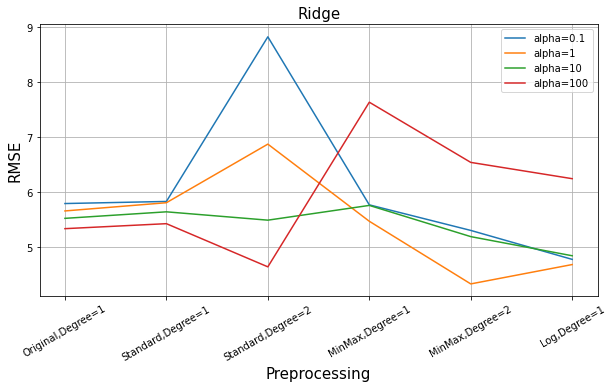

In [158]:
results.set_index('preprocessing').plot(figsize=(10,5),grid=True)
plt.title("Ridge",size=15)
plt.xticks(rotation=30)
plt.xlabel("Preprocessing",size=15)
plt.ylabel("RMSE",size=15)
plt.show()

--------
많은 방식으로 전처리와 하이퍼 파라미터 튜닝을 하는 것이 좋을 것으로 보인다.<br>
일단 위와 같은 실험을 했을 땐, MinMaxScaler + 2차 다항식 변환 하고 alpha=1로 Ridge를 적용했을 때 RMSE가 가장 낮다(4.323)<br><br>
- Log 변환을 보면 alpha값이 0.1~10에서는 모두 Original보다 좋은 성능을 보였다.
- 표준화를 하고 2차 다항식으로 변환하자 alpha값에 따라 성능 차이가 심하다. alpha가 크면 클수록 성능이 개선되고 있다.
- 최댓값/최솟값 정규화 이후 2차 다항식으로 변환하자 alpha=1에서 성능이 크게 개선되었다.   

-> 일반적으로 선형 회귀를 적용하려는 데이터 세트에 데이터 값의 분포가 심하게 왜곡되어 있을 경우에 로그 변환을 적용하는 것이 좋은 결과를 기대할 수 있다.